<h3>Mit einem ANN Digits klassifizieren</h3>

Dieses ist das erste von vielen Notebooks, die noch kommen werden. Thema hier, das Klassifizieren von Digits mit einem einfachen ANN.

In [159]:
# Imports.
import tensorflow as tf
import numpy      as np
import seaborn    as sn

import matplotlib.pyplot as plt

Danach kann mit Keras direkt ein Dataset geladen werden, wir bekommen direkt ein Train- und Testset.

In [85]:
# Ähnlich wie bei Sklearn.
# - Lade Daten
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [86]:
# 60.000 Daten, 28 x 28 Bilder.
X_train.shape

(60000, 28, 28)

In [87]:
# Typ der Daten.
type(X_train[0])

numpy.ndarray

Mit Matplotlib können Bilder in Graustufen angezeigt werden, damit bekommen wir einen Eindruck der Daten.
- Es können auch andere Methoden gewählt werden.
- Bei Sklearn Datasets kann das Dataset Digits auch so dargestellt werden.
- Bei einem 1D Array, muss es vorher in ein 2D Array umgewandelt werden mit reshape() 

<Figure size 640x480 with 0 Axes>

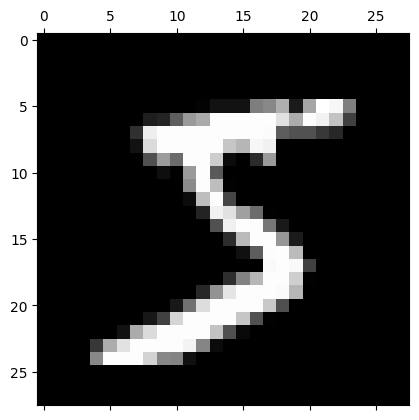

In [88]:
# Zeige ersten Eintrag.
plt.gray()
plt.matshow(X_train[0])

In [89]:
y_train.shape

(60000,)

In [90]:
# Beinhaltet das Target. 
y_train[0]

5

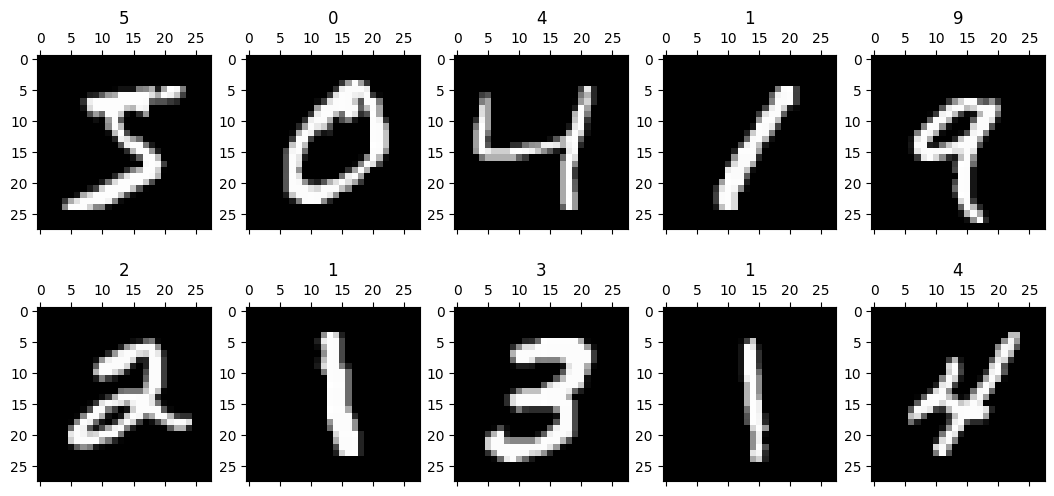

In [91]:
# Zeige mehrere an.
# - So haben wir eine Übersicht.

# Füge optional weitere Inhalte zu.
fig, axs = plt.subplots(2,5, figsize=(13, 6))
axs = axs.ravel()

for i in range(10):
    axs[i].title.set_text(y_train[i])
    axs[i].matshow(X_train[i])

Um ein neurales Netz zu trainieren, muss das Array mit den Daten in ein 1D-Array umgewandelt werden => Vektor
- Bei einem 28 x 28 Array, werden daraus ein Array mit 784 Datenpunkten => 784 Neuronen am Anfang. 

In [92]:
X_train.shape

(60000, 28, 28)

In [93]:
X_test.shape

(10000, 28, 28)

In [103]:
# Nutze Reshape:
X_train_res  = X_train.reshape(60000, 28*28)
X_test_res   = X_test.reshape(10000,  28*28) # Testset nicht vergessen.

In [104]:
# Zeige wieder Shape.
X_train_res.shape

(60000, 784)

Für eine bessere Genauigkeit,müssen die Daten skaliert werden. 

In [69]:
# Das ganze Array kann so skaliert werden:
# - Führe optional weitere Operationen durch. 
np.array([4, 4, 4]) / 2

array([2., 2., 2.])

In [105]:
# Skaliere Daten.
X_train_res = X_train_res / 255
X_test_res = X_test_res / 255

In [123]:
# Erstelle Keras Model.
# - Sequential: Sequenz der angegebenen Schichten von Neuronen. 
# - Dense:      alle Neuronen sind mit den Neuronen der nächsten Schicht verbunden. Als In-Output Layer.
## Alls was das Netz selber machen muss, spiegelt sich in der Trainingszeit wieder.
## - Bei vielen und großen Bildern, ...<
model = tf.keras.Sequential([
    # tf.keras.layers.Flatten( units=(28, 28) )  # Alternativ die Eingaben formatieren, wie 28 x 28 Bilder. 
    tf.keras.layers.Dense(units=10, input_shape=(28*28,), activation='sigmoid')  # 1 Dense Layer, Input und Output in einem L. beschreiben.
    # units = Output shape
])

# Kompiliere:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
# Kostenfunktionen: https://www.tensorflow.org/api_docs/python/tf/keras/losses
# Optimierer:       https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
model

In [124]:
## Alternativ:
#    tf.keras.layers.Dense(28*28),                        # Muss Linear sein.
#    tf.keras.layers.Dense(10, activation='sigmoid')      # Verbindung zur nächsten Schicht.
##

Wie bei Sklearn, kann ein Model jetzt einfach trainiert werden.

In [125]:
model.fit(X_train_res, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 797us/step - loss: 0.4689 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 1s 784us/step - loss: 0.3031 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 1s 776us/step - loss: 0.2834 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 769us/step - loss: 0.2727 - accuracy: 0.9247
Epoch 5/5
1875/1875 [==============================] - 1s 753us/step - loss: 0.2665 - accuracy: 0.9259


In [118]:
# Zusammenfassung des Models.
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Das Model können wir auch größer machen => füge weitere Schichten hinzu. 

In [167]:
# Erstelle zweites Keras Model.

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, input_shape=(28*28,), activation='sigmoid'), # Layer 1 + Layer 2
    tf.keras.layers.Dense(units=25, activation='sigmoid'),  # Layer 3
    tf.keras.layers.Dense(units=10, activation='sigmoid')   # Layer 4
])
# Kompiliere:
model2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [168]:
model2.fit(X_train_res, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 887us/step - loss: 0.7027 - accuracy: 0.8436
Epoch 2/5
1875/1875 [==============================] - 2s 885us/step - loss: 0.2458 - accuracy: 0.9311
Epoch 3/5
1875/1875 [==============================] - 2s 886us/step - loss: 0.1817 - accuracy: 0.9479
Epoch 4/5
1875/1875 [==============================] - 2s 889us/step - loss: 0.1454 - accuracy: 0.9587
Epoch 5/5
1875/1875 [==============================] - 2s 920us/step - loss: 0.1215 - accuracy: 0.9653


Danach können wir die Testdaten nutzen, um das Model zu evaluieren.

In [126]:
model.evaluate(X_test_res, y_test)

313/313 [==============================] - 0s 670us/step - loss: 0.2693 - accuracy: 0.9254


[0.2692752480506897, 0.9254000186920166]

Das Model wurde mit skalierten Daten trainiert, das Testen bzw. Predicten muss ebenfalls mit skalieren Daten stattfinden.

In [138]:
# Alle Daten.
model.predict(X_test_res)

313/313 [==============================] - 0s 580us/step


array([[3.0771168e-02, 3.2870639e-07, 7.6763585e-02, ..., 9.9983847e-01,
        1.1603983e-01, 7.2598571e-01],
       [4.6985453e-01, 2.7054506e-03, 9.9958766e-01, ..., 7.8899138e-13,
        1.5056892e-01, 2.7950615e-09],
       [5.9189112e-04, 9.9418569e-01, 7.2028840e-01, ..., 1.5206495e-01,
        4.0992790e-01, 5.7708893e-02],
       ...,
       [6.3016764e-06, 3.2440455e-06, 1.8056374e-03, ..., 2.3723021e-01,
        6.2548417e-01, 8.3242220e-01],
       [1.5340479e-04, 1.1985545e-04, 1.9114696e-04, ..., 3.4991939e-05,
        6.0639381e-01, 1.4464636e-04],
       [1.6731016e-02, 2.3800542e-10, 2.0172851e-01, ..., 1.1770433e-08,
        3.3981114e-04, 7.7454774e-07]], dtype=float32)

In [142]:
# Oder So, ...,:
model.predict(X_test_res[:1])

1/1 [==============================] - 0s 16ms/step


array([[3.0771175e-02, 3.2870608e-07, 7.6763563e-02, 9.5649159e-01,
        3.4048557e-03, 1.8329741e-01, 1.7067611e-06, 9.9983847e-01,
        1.1603983e-01, 7.2598571e-01]], dtype=float32)

In [143]:
# Höchste Score einer Klasse.
np.array(model.predict(X_test_res[:1])).max()

1/1 [==============================] - 0s 15ms/step


0.9998385

In [145]:
# Gebe Index zurück. Index = Klasse.
np.argmax(model.predict(X_test_res[:1])).max()

1/1 [==============================] - 0s 14ms/step


7

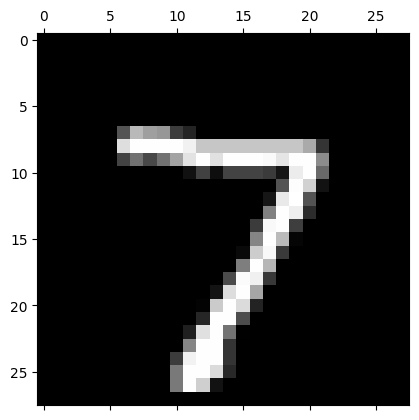

In [148]:
# Nutze reshape(), da 1D Array.
plt.matshow(X_test_res[:1].reshape(28, 28))

Wie in Sklearn kann auch hier eine Heat-Map genutzt werden. <br>
TensorFlow erlaubt es schnell eine solche Ansicht zu erstellen.

Um die Predictions nutzen zu können, müssen diese alle von den Arrays extrahiert werden. 

In [150]:
# Array[10 Items] => Array [1 Item] => lege in target_predicted[]
target_predicted = [np.argmax(i) for i in model.predict(X_test_res) ]

313/313 [==============================] - 0s 619us/step


In [152]:
# Mit TF kann direkt die Beschriftung mit angegeben werden.
tf.math.confusion_matrix(labels=y_test, predictions=target_predicted)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   8,    8,  924,   15,    6,    4,   12,   10,   41,    4],
       [   4,    0,   20,  917,    1,   26,    2,    9,   24,    7],
       [   2,    1,    6,    1,  905,    0,   11,    4,   10,   42],
       [   9,    2,    2,   30,    7,  784,   14,    5,   34,    5],
       [  13,    3,    6,    1,    7,   13,  911,    2,    2,    0],
       [   1,    5,   25,    6,    6,    1,    0,  950,    3,   31],
       [  10,    5,    6,   21,    9,   29,    9,   11,  868,    6],
       [  11,    7,    1,   10,   21,    8,    0,   21,    7,  923]])>

Text(95.72222222222221, 0.5, 'Truth')

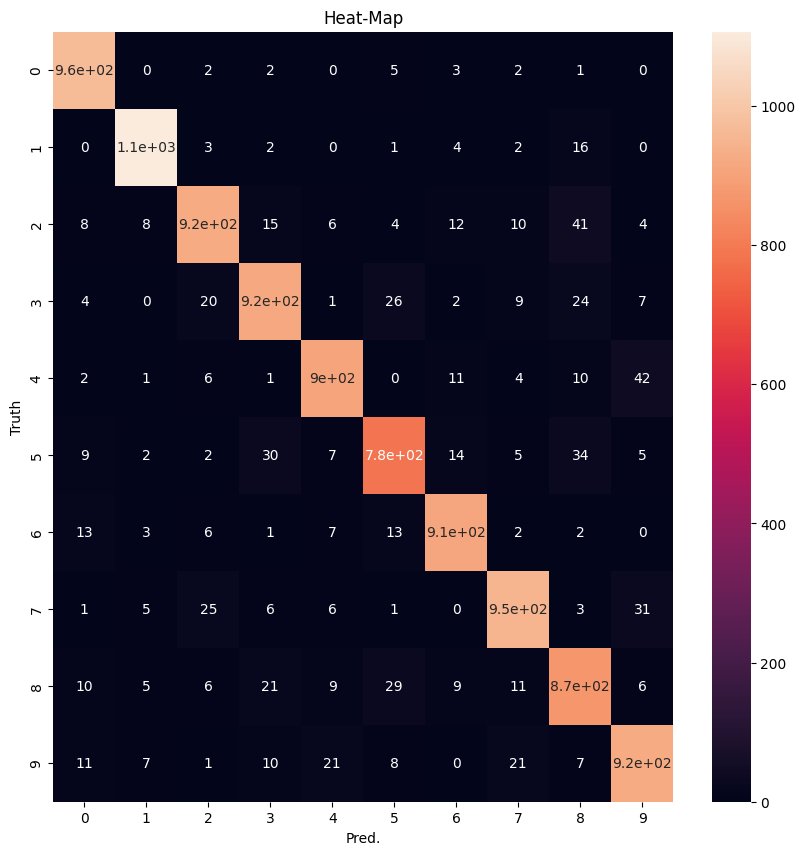

In [165]:
# Mit Matplotlib und Seaborn visualisieren.
heatmap = tf.math.confusion_matrix(labels=y_test, predictions=target_predicted)
plt.figure(figsize=(10, 10))
sn.heatmap(heatmap, annot=True)
plt.title("Heat-Map")
plt.xlabel("Pred.")
plt.ylabel("Truth")